In [998]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [999]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans

In [1000]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [1001]:
%matplotlib inline

In [1002]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [1003]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [1004]:
# Files to use 
filenamePrice = 'Own_Factor_AdjustedPriceForward-1d.csv'
filenameST = 'LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday = 'LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag = 'LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu = 'LZ_GPA_INDU_ZX.csv'
filenameFCAP = 'LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor = 'LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [1005]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率   012-2016 Cum return 0.9(group1),1.4(group8) monotonicity: Normal
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率   012-2016 Cum return 1.1(group2),0.1(group9) monotonicity: Good+
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率   012-2016 Cum return 0.9(group0),0.3(group9) monotonicity: Good+
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率   2012-2016 Cum return 0.95(group0),0.35(group8) monotonicity: Normal
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率 2012-2016 Cum return 1.1(group2),0.2(group9) monotonicity: Normal

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%) 2012-2016 Cum return 1.1(group8),0.41(group1) monotonicity: Good+
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%) 2012-2016 Cum return 1.2(group9),0.2(group1) monotonicity: Good
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%) 2012-2016 Cum return 0.98(group8),0.4(group2) monotonicity: Good
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%) 2012-2016 Cum return 1.17(group7),0.18(group1) monotonicity: Normal
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)  2012-2016 Cum return 0.85(group4),0.5(group0) monotonicity: Normal

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销 2012-2016 Cum return 0.95(group0),0.6(group9) monotonicity: Normal+
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率 2012-2016 Cum return 0.85(group0),0.53(group2) monotonicity: Normal+
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债 2012-2016 Cum return 0.8(group7),0.6(group8) monotonicity: Normal
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计 2012-2016 Cum return 0.8(group0),0.55(group4) monotonicity: Normal
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入 2012-2016 Cum return 0.84(group3),0.23(group9) monotonicity: Normal
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM) 2012-2016 Cum return 0.72(group8),0.41(group1) monotonicity: Good

filenameBERYRATIO = 'LZ_GPA_DERI_BerryRatio.csv' #边际毛利/营运开支 2012-2016  monotonicity: bad ,not useful at all

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量 2012-2016 Cum return 1.0(group3), - 0.3(group9) monotonicity: Normal+
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转 2012-2016 Cum return 0.85(group0), - 0.2(group9) monotonicity: Good
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转 2012-2016 Cum return 0.65(group7), 0.4(group9) monotonicity: Normal
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度  2012-2016 Cum return 0.47(group0), -0.3(group9) monotonicity: Good
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量  2012-2016 Cum return 0.7(group0), 0.1(group9) monotonicity: Normal
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv' # 斜率   2012-2016 Cum return 1.1(group0), 0.25(group8) monotonicity: Good+
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD   2012-2016 Cum return 0.8(group3), -0.4(group9) monotonicity: Normal
finenameBB = 'LZ_GPA_DERI_BB_20.csv'  # Bolling_bands  2012-2016 Cum return 0.75(group3) , 0.05(group9)  monotonicity: Normal 

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值 2012-2016 Cum return 0.7(group4) , 0.1(group9)  monotonicity: Normal 
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'    #  日均成交额   2012-2016 Cum return 1.52(group0) , -0.27(group9)  monotonicity: Perfect
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'         # 非流动性因子  2012-2016 Cum return 1.5(group9), - 0.07(group1) monotonicity: Perfect
filenameTURNOVER = 'LZ_GPA_VAL_TURN.csv'    # 换手率 2012-2016 Cum return  0.78(group6), - 0.25(group9) monotonicity: Normal（除了第九组外其他差不多）
filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv' # 非流动性 2012-2016 Cum return 1.5(group9), - 0.25(group0) monotonicity: Perfect
filenameADJILLIQ = 'Own_Factor_ADJ_ILLQ_1D.csv' # 非流动性(市值调整) 
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' # 市值调整日均成交额 2012-2016 Cum return 1.25(group0), - 0.5(group9) monotonicity: Perfect

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动   2012-2016 Cum return  0.65(group8), 0.4(group1) monotonicity : Normal
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率     2012-2016 Cum return 0.65(group1), - 0.26(group9) monotonicity: Good
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均 2012-2016 Cum return 0.8(group1) , -0.4(group9)  monotonicity：Good

filenameTOV20 = 'Own_Factor_Turnover_Volatility_20D.csv' # 20天换手率波动率
filenameADJTOV20 = 'Own_Factor_ADJ_Turnover_Volatility_20D.csv' # 20天换手率波动率（市值调整） 2012-2016 Cum return 1.8(group0), -0.3(group9) monotonicity: perfect
filenameTOVD20 = 'Own_Factor_Turnover_Volatility_deviation_20D.csv' # 20天换手率均值除500天换手率均值-1
filenameADJTOVD20 = 'Own_Factor_ADJ_Turnover_Volatility_Deviation_20D.csv' # 20天换手率均值除500天换手率均值-1(市值调整)  Cum return 0.7(group0), -0.2(group9)Good

In [1006]:
#
#filenameSpecificVol = 'Own_Factor_Specific_Volatility.csv' # 特质波动率
filenameAroon = 'Aroon_Allstocks.csv' 
filenameAdjTOTrue = 'Own_Factor_AdjustedTurnOver-1d.csv'# 真市值调整换手率 2012-2016 Cum return 1.0(group7), - 0.4(group9) monotonicity: Normal
filenameDDA = 'Own_Factor_DDA-1d.csv'  # 股票每日成交额(前复权)  2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filennameQFAEPS = 'LZ_GPA_FIN_IND_QFA_EPS.csv' # 单季度每股收益
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameADJDDA20 ='Own_Factor_ADJ_DDA_20D.csv' # 中性化（仅去市值）后的DDA20
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异波动率  2012-2016 Cum return 0.9(group1), 0(group9) monotonicity: Good+
filenameOwnSkewness = 'Own_Factor_Skewness_250d.csv'  # 250日偏度
filenameOwnReturnSkew = 'Own_Factor_Return_Skew_250D.csv' # 250日收益率偏度
filenamePPO ='LZ_GPA_DERI_PPO.csv' #
filename_5_20_deviation = 'Own_Factor_5_20_price_deviation_1D.csv'  #  5日价格平均除以20日价格平均
filename_5_20_return_deviation = 'Own_Factor_5_20_return_deviation_1D.csv'  # 5日平均收益除以20日平均收益
filenameSharpe = 'Own_Factor_sharpe_ratio_20D.csv'  # 20日夏普比率
filenameDownsideRisk = 'Own_Factor_downside_risk_252D.csv' # 252日下行波动率  不太好的因子
filenameSortinoRatio = 'Own_Factor_sortino_ratio_20D.csv'  # 20日sortino比率   不太好的因子

In [1007]:
# Uqer factor
filenameUQAD20 = 'Uqer_factor_AD20.csv'    #累积/派发线（Accumulation / Distribution Line)的20日均线
filenameUQADTM = 'Uqer_factor_ADTM.csv'    #动态买卖气指标，用开盘价的向上波动幅度和向下波动幅度的距离差值来描述人气高低的指标。属于情绪类因子
filenameUQATR6 = 'Uqer_factor_ATR6.csv'    #6日均幅指标（Average TRUE Ranger），取一定时间周期内的股价波动幅度的移动平均值 （# perfect!）
filenameUQAroon = 'Uqer_factor_Aroon.csv'   #Aroon通过计算自价格达到近期最高值和最低值以来所经过的期间数
filenameUQBias10 = 'Uqer_factor_BIAS10.csv' # 10日乖离率，简称Y值，是移动平均原理派生的一项技术指标，表示股价偏离趋向指标斩百分比值
filenameUQCCI10 = 'Uqer_factor_CCI10.csv'   # 10日顺势指标（Commodity Channel Index），专门测量股价是否已超出常态分布范围(效果不太理想)
filenameUQKDJ_K = 'Uqer_factor_KDJ_K.csv'   #随机指标。它综合了动量观念、强弱指标及移动平均线的优点，用来度量股价脱离价格正常范围的变异程度。（不理想0
filenameROC6 = 'Uqer_factor_ROC6.csv' #6日变动速率（Price Rate of Change），以当日的收盘价和N天前的收盘价比较
filenameRVI = 'Uqer_factor_RVI.csv' # 相对离散指数（Relative Volatility Index）
filenameCMO = 'Uqer_factor_CMO.csv' # 钱德动量摆动指标（Chande Momentum Osciliator）  # 相当不错的因子，单调性相当好！特别是分行业之后！
filenameRSI = 'Uqer_factor_RSI.csv'  # 相对强弱指标（Relative Strength Index）   或许还可以？

In [1008]:
# Not good factors but maybe useful
filenameOVERVOL = 'Over_Heat_Volume.csv' 
filenameSIZE = 'LZ_GPA_VAL_A_FCAP.csv'
filenameExcessReturn = 'Own_Factor_excess_return_20D.csv'
filenameROE = 'LZ_GPA_FIN_IND_ROE.csv'

In [1009]:
# ROE x日 波动率
filenameRoeVol60 = 'Own_Factor_ROE_Volatility_60D.csv'   # 和预期不符
filenameRoeVol120 = 'Own_Factor_ROE_Volatility_120D.csv'  # 符合预期，即ROE波动小的组收益较好,单调性不明显
filenameRoeVol250 = 'Own_Factor_ROE_Volatility_250D.csv'   # 符合预期，单调性非常好，描述ROE波动率可用此因子！good+!

In [1010]:
# Non_linear factor
filenameNLFCAP ='Own_factor_Nonlinear_FCAP.csv'

In [1011]:
# Constants
startTime =  datetime.strptime('20100101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [1012]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [1013]:
#
sololist = [filenameRSI]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [1014]:
induExplanation

LZ_GPA_TMP_INDU_ZX-t
0                  石油石化
1                    煤炭
2                  有色金属
3               电力及公用事业
4                    钢铁
5                  基础化工
6                    建筑
7                    建材
8                  轻工制造
9                    机械
10                 电力设备
11                 国防军工
12                   汽车
13                 商贸零售
14                 餐饮旅游
15                   家电
16                 纺织服装
17                   医药
18                 食品饮料
19                 农林牧渔
20                   银行
21                非银行金融
22                  房地产
23                 交通运输
24                电子元器件
25                   通信
26                  计算机
27                   传媒
28                   综合

In [1015]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [1016]:
sololist[0]

'Uqer_factor_RSI.csv'

In [1017]:
sparedata = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0)

In [1018]:
sparedata.tail()

000001.XSHE  000002.XSHE  000004.XSHE  000005.XSHE  000006.XSHE  \
2017-05-22      45.8333      51.2077          NaN      21.7742      49.8008   
2017-05-23      61.1111      58.0952          NaN      32.2314      50.4032   
2017-05-24      67.6471      70.9302          NaN      33.6207      56.3063   
2017-05-25      75.5556      82.6389          NaN      42.5373      58.3691   
2017-05-26      74.7126      82.6389          NaN      46.3415      65.2361   

            000007.XSHE  000008.XSHE  000009.XSHE  000010.XSHE  000011.XSHE  \
2017-05-22          NaN      16.7196      15.4930      15.9091      55.3223   
2017-05-23          NaN      20.3871      14.1935      13.9073      60.7355   
2017-05-24          NaN      24.4582      22.6027      15.7895      63.1764   
2017-05-25          NaN      40.9201      25.6579      18.2482      65.7485   
2017-05-26          NaN      37.2881      31.4516      20.6612      61.6978   

               ...       603987.XSHG  603988.XSHG  603989.XSHG  603990.XSHG  \
2017-05-22     ...           36.5530      64.0094      50.3386      23.2028   
2017-05-23     ...           30.5311      54.5018      35.5438      20.4563   
2017-05-24     ...           37.0564      57.8882      40.1962      26.0432   
2017-05-25     ...           32.9358      57.0376      43.4508      28.0015   
2017-05-26     ...           36.7746      58.1380      39.0458      36.1984   

            603991.XSHG  603993.XSHG  603996.XSHG  603997.XSHG  603998.XSHG  \
2017-05-22      28.6674      42.1053      39.5973      58.4924      11.6505   
2017-05-23      22.3191      49.2754      39.4821      54.6833      12.6316   
2017-05-24      26.9694      50.0000      54.7186      21.2993      14.1176   
2017-05-25      26.2873      50.0000      32.9328      18.3514      18.2353   
2017-05-26      33.1250      57.3770      52.6166       0.0000      18.6747   

            603999.XSHG  
2017-05-22      21.4646  
2017-05-23      16.3776  
2017-05-24      18.2390  
2017-05-25      17.1975  
2017-05-26      18.6207  

[5 rows x 3254 columns]

In [1019]:
# adjust the columns name of the Uqer data same as the own factor
if 'Uqer' in sololist[0]: 
    uqercolumnList = sparedata.columns.tolist()
    uqercolumnName = [x.split('.')[0] for x in uqercolumnList]
    newcolumnList = stDF.columns.tolist()
    newcolumnName = [x.split('.')[0] for x in newcolumnList]
    columndict = dict(zip(newcolumnName,newcolumnList))
    finalcolumns = []
    for stk in uqercolumnName:
        if stk in newcolumnName:
            stk = columndict[stk]
        else:
            pass
        finalcolumns.append(stk)
    sparedata.columns = finalcolumns
    addNanColumns = list(set(newcolumnList) - set(sparedata.columns))
    addData = pd.DataFrame(index = sparedata.index,columns = addNanColumns,dtype =float)
    sparedata = pd.concat([sparedata,addData],axis=1)
    sparedata = sparedata[newcolumnList]

In [1020]:
stDF

000005.SZ  600601.SH  600602.SH  600651.SH  \
LZ_GPA_SLCIND_ST_FLAG-t                                               
2010-01-04                     NaN        NaN        NaN        NaN   
2010-01-05                     NaN        NaN        NaN        NaN   
2010-01-06                     NaN        NaN        NaN        NaN   
2010-01-07                     NaN        NaN        NaN        NaN   
2010-01-08                     NaN        NaN        NaN        NaN   
2010-01-11                     NaN        NaN        NaN        NaN   
2010-01-12                     NaN        NaN        NaN        NaN   
2010-01-13                     NaN        NaN        NaN        NaN   
2010-01-14                     NaN        NaN        NaN        NaN   
2010-01-15                     NaN        NaN        NaN        NaN   
2010-01-18                     NaN        NaN        NaN        NaN   
2010-01-19                     NaN        NaN        NaN        NaN   
2010-01-20                     NaN        NaN        NaN        NaN   
2010-01-21                     NaN        NaN        NaN        NaN   
2010-01-22                     NaN        NaN        NaN        NaN   
2010-01-25                     NaN        NaN        NaN        NaN   
2010-01-26                     NaN        NaN        NaN        NaN   
2010-01-27                     NaN        NaN        NaN        NaN   
2010-01-28                     NaN        NaN        NaN        NaN   
2010-01-29                     NaN        NaN        NaN        NaN   
2010-02-01                     NaN        NaN        NaN        NaN   
2010-02-02                     NaN        NaN        NaN        NaN   
2010-02-03                     NaN        NaN        NaN        NaN   
2010-02-04                     NaN        NaN        NaN        NaN   
2010-02-05                     NaN        NaN        NaN        NaN   
2010-02-08                     NaN        NaN        NaN        NaN   
2010-02-09                     NaN        NaN        NaN        NaN   
2010-02-10                     NaN        NaN        NaN        NaN   
2010-02-11                     NaN        NaN        NaN        NaN   
2010-02-12                     NaN        NaN        NaN        NaN   
...                            ...        ...        ...        ...   
2017-01-11                     NaN        NaN        NaN        NaN   
2017-01-12                     NaN        NaN        NaN        NaN   
2017-01-13                     NaN        NaN        NaN        NaN   
2017-01-16                     NaN        NaN        NaN        NaN   
2017-01-17                     NaN        NaN        NaN        NaN   
2017-01-18                     NaN        NaN        NaN        NaN   
2017-01-19                     NaN        NaN        NaN        NaN   
2017-01-20                     NaN        NaN        NaN        NaN   
2017-01-23                     NaN        NaN        NaN        NaN   
2017-01-24                     NaN        NaN        NaN        NaN   
2017-01-25                     NaN        NaN        NaN        NaN   
2017-01-26                     NaN        NaN        NaN        NaN   
2017-02-03                     NaN        NaN        NaN        NaN   
2017-02-06                     NaN        NaN        NaN        NaN   
2017-02-07                     NaN        NaN        NaN        NaN   
2017-02-08                     NaN        NaN        NaN        NaN   
2017-02-09                     NaN        NaN        NaN        NaN   
2017-02-10                     NaN        NaN        NaN        NaN   
2017-02-13                     NaN        NaN        NaN        NaN   
2017-02-14                     NaN        NaN        NaN        NaN   
2017-02-15                     NaN        NaN        NaN        NaN   
2017-02-16                     NaN        NaN        NaN        NaN   
2017-02-17                     NaN        NaN        NaN        NaN   
2017-02-20                     NaN        NaN    

In [1021]:
## easy way to calculate the last day of the month
#stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
#stDF.groupby(['label'])

In [1022]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [1023]:
LFCAPDF = np.log10(ff.getData(thresholdNum, startTime, endTime,filename = filenameFCAP))

In [1024]:
#fs = np.log10(pd.read_csv(path+ filenameFCAP ,infer_datetime_format=True,parse_dates=[0],index_col=0))

#fs[fs>fs.quantile(0.9,axis=1)] = np.NaN
#fs.to_csv(path+'Own_factor_Nonlinear_FCAP.csv',na_rep='NaN',date_format='%Y%m%d')

In [1025]:
#fs[fs<fs.quantile(0.4,axis=1)]

In [1026]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [1027]:
# calculate correlation between two factors
if  'Uqer' in sololist[0]:
    factor1 = sparedata.loc[startTime:endTime]
else:
    factor1 = pd.read_csv(path+sololist[0],infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(factor1,LFCAPDF, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

Pearson   Spearman
count  86.000000  86.000000
mean    0.001488  -0.004277
std     0.184206   0.173686
min    -0.374754  -0.342266
25%    -0.135657  -0.140503
50%    -0.001873   0.013828
75%     0.126790   0.110474
max     0.474459   0.382266

In [1028]:
factor1

000005.SZ  600601.SH  600602.SH  600651.SH  600652.SH  600653.SH  \
2010-01-04    43.7500    52.0894    61.8782    70.2497    44.8328    38.4615   
2010-01-05    61.6352    65.0459    70.6592    83.6219    60.8382    45.4545   
2010-01-06    68.0556    70.0593    81.9602    84.8667    64.4717    51.7241   
2010-01-07    54.4872    61.3843    67.6923    74.6399    55.8052    38.4615   
2010-01-08    65.9420    73.8568    72.5875    74.1049    74.0775    59.5745   
2010-01-11    61.9718    74.0360    69.1622    75.3799    72.6121    51.1628   
2010-01-12    64.9351    73.0427    67.9035    68.9417    68.8124    50.0000   
2010-01-13    49.1935    73.6522    63.0897    46.9155    54.9767    43.7500   
2010-01-14    51.6129    71.7351    66.8220    56.4200    56.9012    54.2373   
2010-01-15    54.0984    75.7463    64.1611    55.7198    58.7031    49.1228   
2010-01-18    58.2090    77.7033    70.2641    73.7577    64.3975    53.9683   
2010-01-19    52.7778    69.1149    56.5824    71.4827    60.6108    68.1319   
2010-01-20    46.9136    54.7303    44.7895    53.3364    49.0805    61.3861   
2010-01-21    39.0071    48.8516    45.3646    49.8049    43.1303    64.4860   
2010-01-22    35.7143    49.6409    43.1402    37.5766    41.7123    59.4828   
2010-01-25    37.1622    51.6340    48.6049    39.6950    42.5577    60.0000   
2010-01-26    28.4884    38.7265    29.8549    36.8398    33.3333    49.6241   
2010-01-27    28.9941    27.5414    31.8464    30.8528    31.6102    50.3817   
2010-01-28    14.2857    34.8565    34.0437    32.9006    30.4111    48.4127   
2010-01-29    29.2994    23.6559    35.4891    37.3217    34.2177    51.6667   
2010-02-01    29.7468    19.9779    26.8638    25.4762    26.2463    41.5929   
2010-02-02    26.4706    16.8578    28.0566    35.2503    21.2610    41.9643   
2010-02-03    20.8861    23.8045    31.9537    20.1928    26.0331    41.4414   
2010-02-04    32.7381    28.6697    36.1508    23.7041    26.0151    24.4186   
2010-02-05    34.3750    34.1064        NaN    26.7462    40.9233    27.2727   
2010-02-08    35.5828    31.6832    46.0699    29.7919    36.3333    28.2051   
2010-02-09    37.6623    41.0104    41.5564    39.1185    45.1932    34.7222   
2010-02-10    45.0000    47.8758    60.3213    43.6351    52.6753    41.9355   
2010-02-11    57.2727    50.0000    67.2065    48.1593    62.7473    56.5217   
2010-02-12    60.9091    55.0505    90.4139    57.6561    67.0455    60.7843   
...               ...        ...        ...        ...        ...        ...   
2017-01-11    50.0000    44.6809    56.9427    50.5376    59.3220    43.3333   
2017-01-12    44.8718    46.6667    50.0000    56.3218    40.8451    38.2353   
2017-01-13    39.3258    38.8889    40.8966    38.5246    48.0519    33.3333   
2017-01-16    31.2500    30.0000    33.8380    24.3523    19.6721    23.6364   
2017-01-17    36.7925    33.3333    51.1186    23.9796    29.3532    23.6364   
2017-01-18    40.7080    35.4839    39.0666    21.9388    26.6355    22.8070   
2017-01-19    33.3333    27.5862    36.0020    17.7419    24.1546    15.0000   
2017-01-20    25.7143    31.1475    37.5737    19.4737    27.6498    17.7419   
2017-01-23    28.8462    28.8136    36.0020    19.4737    29.6651    21.8750   
2017-01-24    24.0000    29.8246    36.1842    16.0804    28.8372    22.5806   
2017-01-25    21.6495    25.9259    34.8657    17.9894    32.4444    20.0000   
2017-01-26    26.3158    26.4151    39.8714    12.4294    32.7354    18.6441   
2017-02-03    30.1205    29.7872    46.3391    14.9068    28.9683    28.8136   
2017-02-06    35.4430    33.3333        NaN    25.9459    32.9167    33.3333   
2017-02-07    44.4444    40.0000        NaN    30.9677    29.4606    36.0000   
2017-02-08    65.3061    68.0000        NaN    60.0000    60.3774    58.8235   
2017-02-09    65.3061    72.4138        NaN    68.3544    55.0000    67.6471   
2017-02-10    60.4651    82.1429        NaN    65.0602    58.7786    75.6757   
2017-02-13  

In [1029]:
#%lprun -f ff.getLastDayOfMonth ff.getLastDayOfMonth(LFCAPDF.index)

In [1030]:
activeReturnData = ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [1031]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2010-01-29 00:00:00 296
2010-02-26 00:00:00 331
2010-03-31 00:00:00 340
2010-04-30 00:00:00 342
2010-05-31 00:00:00 348
2010-06-30 00:00:00 346
2010-07-30 00:00:00 331
2010-08-31 00:00:00 323
2010-09-30 00:00:00 322
2010-10-29 00:00:00 326
2010-11-30 00:00:00 329
2010-12-31 00:00:00 338
2011-01-31 00:00:00 348
2011-02-28 00:00:00 374
2011-03-31 00:00:00 372
2011-04-29 00:00:00 375
2011-05-31 00:00:00 336
2011-06-30 00:00:00 360
2011-07-29 00:00:00 328
2011-08-31 00:00:00 321
2011-09-30 00:00:00 318
2011-10-31 00:00:00 298
2011-11-30 00:00:00 307
2011-12-30 00:00:00 310
2012-01-31 00:00:00 291
2012-02-29 00:00:00 287
2012-03-30 00:00:00 327
2012-04-27 00:00:00 375
2012-05-31 00:00:00 315
2012-06-29 00:00:00 321
2012-07-31 00:00:00 261
2012-08-31 00:00:00 243
2012-09-28 00:00:00 228
2012-10-31 00:00:00 207
2012-11-30 00:00:00 201
2012-12-31 00:00:00 191
2013-01-31 00:00:00 185
2013-02-28 00:00:00 185
2013-03-29 00:00:00 193
2013-04-26 00:00:00 187
2013-05-31 00:00:00 181
2013-06-28 00:00

In [1032]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(thresholdNum, startTime, endTime,availableData = factor1)

for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,groupNum=10,Mean_Num=1)

In [1033]:
totalGroupDict

{Timestamp('2010-01-29 00:00:00'): {'group_0': ['002436.SZ',
   '000898.SZ',
   '002563.SZ',
   '002254.SZ',
   '600740.SH',
   '300204.SZ',
   '002280.SZ',
   '002284.SZ',
   '601866.SH',
   '601600.SH',
   '600480.SH',
   '000709.SZ',
   '002557.SZ',
   '000612.SZ',
   '002286.SZ',
   '000985.SZ',
   '600961.SH',
   '600386.SH',
   '600432.SH',
   '601088.SH',
   '600547.SH',
   '000601.SZ',
   '000822.SZ',
   '601558.SH',
   '000878.SZ',
   '601899.SH',
   '600111.SH',
   '002289.SZ',
   '600497.SH',
   '600776.SH',
   '300155.SZ',
   '000060.SZ',
   '600302.SH',
   '600348.SH',
   '002288.SZ',
   '002303.SZ',
   '000698.SZ',
   '600408.SH',
   '000554.SZ',
   '600399.SH',
   '600997.SH',
   '002440.SZ',
   '600331.SH',
   '600028.SH',
   '000949.SZ',
   '300206.SZ',
   '601668.SH',
   '000983.SZ',
   '000968.SZ',
   '600677.SH',
   '601699.SH',
   '000758.SZ',
   '600019.SH',
   '600058.SH',
   '600148.SH',
   '600219.SH',
   '600741.SH',
   '601857.SH',
   '600236.SH',
   '601666.

In [1034]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
sizeDistribution = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None, dtype =float)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
        sizeDistribution.loc[time][group] = LFCAPDF.loc[time][totalGroupDict[time][group]].quantile()
ReturnDF.sort_index(axis=1,inplace=True)
sizeDistribution.sort_index(axis=1,inplace=True)

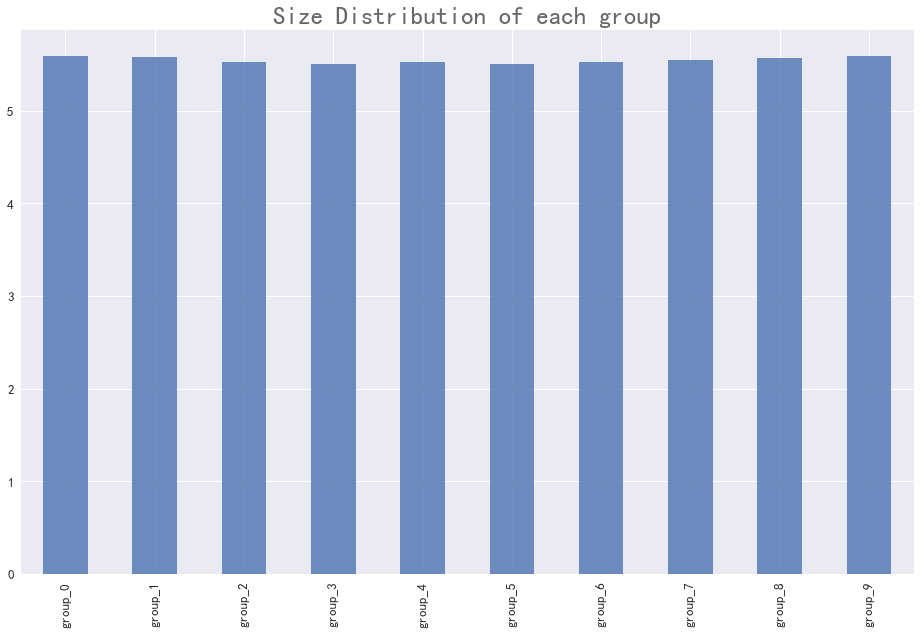

In [1035]:
# show size distribution(quantile plot)
fig = plt.figure(figsize=(16,10))
# Add a subplot
ax = fig.add_subplot(111)
sizeDistribution.median().plot(kind='bar',ax = ax, fontsize =13,title ='Size Distribution of each group',alpha =0.8)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=25)

In [1036]:
sizeDistribution.quantile()
sizeMono = sizeDistribution.quantile().corr(pd.Series(index = sizeDistribution.quantile().index,data = range(len(sizeDistribution.quantile()))),\
                                           method = 'spearman')
sizeMono

0.11515151515151514

In [1037]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = ReturnDF.columns, data=range(len(ReturnDF.columns)))
monoDF = pd.DataFrame(index = ReturnDF.index, columns=['Spearman_Cor'], dtype = float)
for date in ReturnDF.index:
    monoDF.loc[date] = ReturnDF.loc[date].corr(referSeries,method='spearman')   

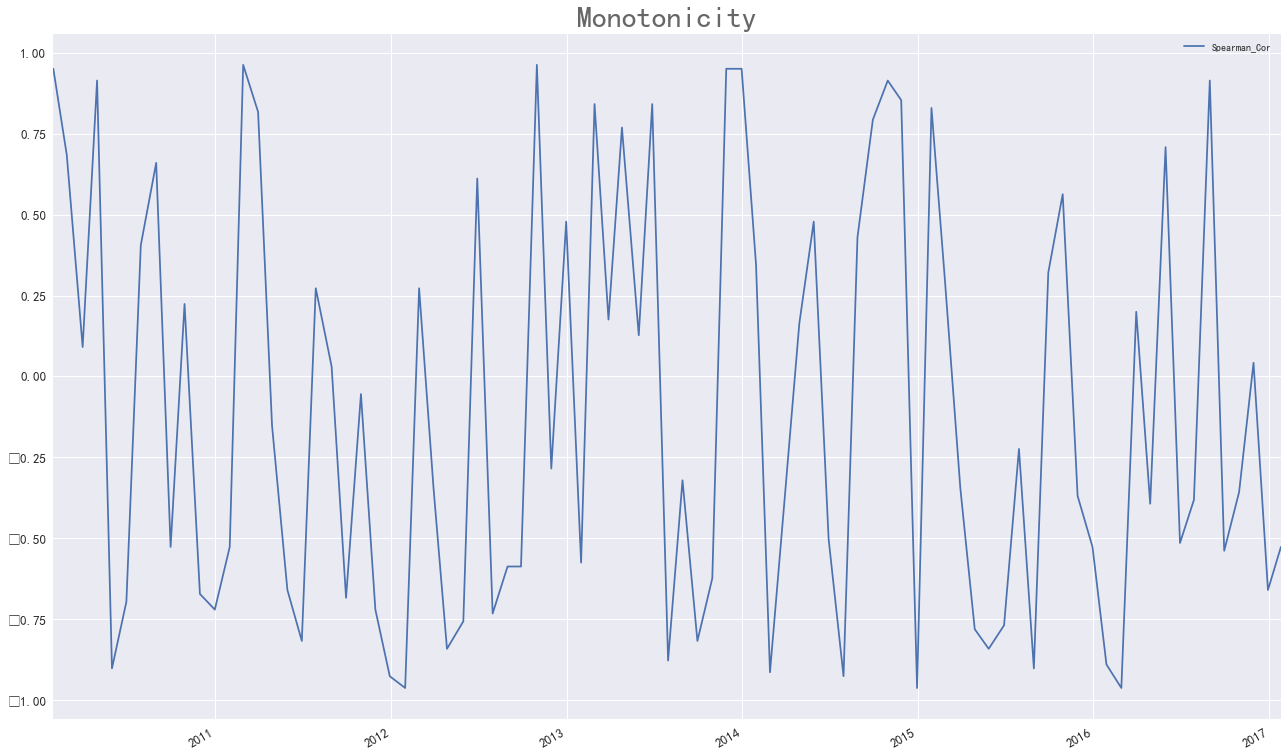

In [1038]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [1039]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [1040]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [1041]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

9.9284037032288737

In [1042]:
# long top group short bot group 
sortGroups = ReturnDF[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
ReturnDF['top_bot_comb'] = ReturnDF[top] - ReturnDF[bot]

In [1043]:
top, bot

('group_0', 'group_9')

In [1044]:
ReturnDF.cumsum().tail()

group_0   group_1   group_2   group_3   group_4   group_5  \
2016-09-30  0.407614  0.532296  0.800892  0.816033  0.832199  0.892748   
2016-10-31  0.398224  0.547057  0.815429  0.826292  0.841841  0.900060   
2016-11-30  0.405425  0.560030  0.832175  0.835151  0.849575  0.914304   
2016-12-30  0.426539  0.564912  0.824513  0.819034  0.843972  0.895741   
2017-01-26  0.439601  0.574073  0.825910  0.826434  0.847961  0.899860   

             group_6   group_7   group_8   group_9  top_bot_comb  
2016-09-30  0.667877  0.458826  0.206069 -0.372366      0.779980  
2016-10-31  0.682204  0.470851  0.196350 -0.369597      0.767821  
2016-11-30  0.703262  0.483458  0.211674 -0.379704      0.785129  
2016-12-30  0.687979  0.473895  0.197224 -0.396342      0.822880  
2017-01-26  0.695911  0.486475  0.184255 -0.406741      0.846342

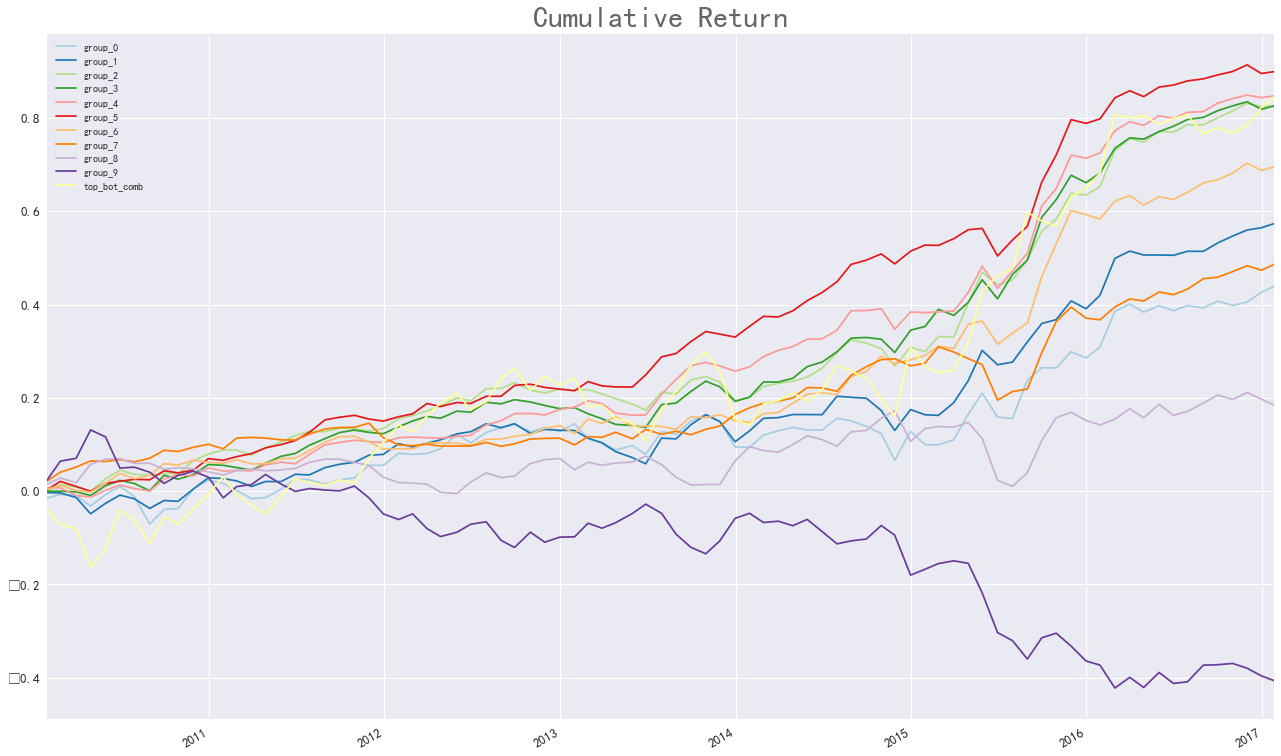

In [1045]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),ax=ax,  color=sns.color_palette("Paired",11),fontsize =13,title ='Cumulative Return')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

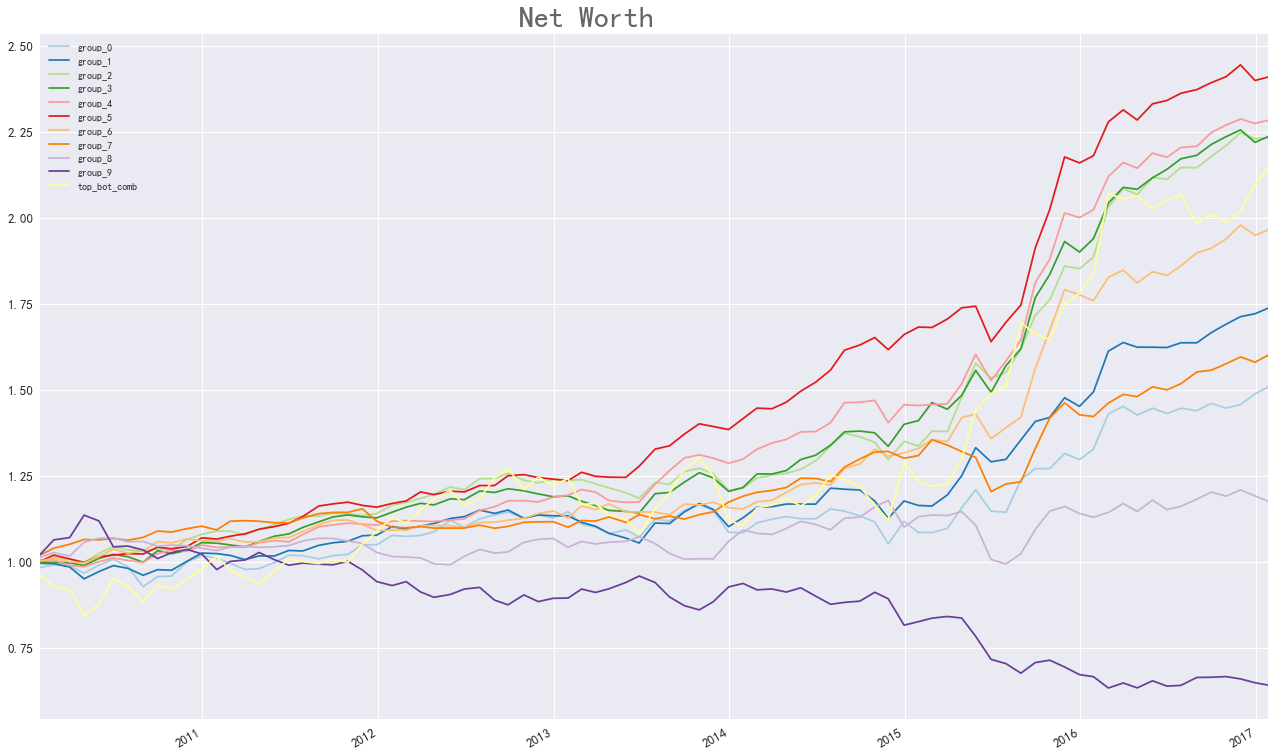

In [1046]:
# Net worth plot 
netWorthDF = (ReturnDF.astype(float)+1).cumprod()
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
netWorthDF.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [1047]:
# Calc spearman correlation to investigate monotonicity
referSeries = pd.Series(index = netWorthDF.iloc[:,:-1].columns, data=range(len(netWorthDF.iloc[:,:-1].columns)))
monoDF = pd.DataFrame(index = netWorthDF.index, columns=['Spearman_Cor'], dtype = float)
for date in netWorthDF.index:
    monoDF.loc[date] = netWorthDF.iloc[:,:-1].loc[date].corr(referSeries,method='spearman')   

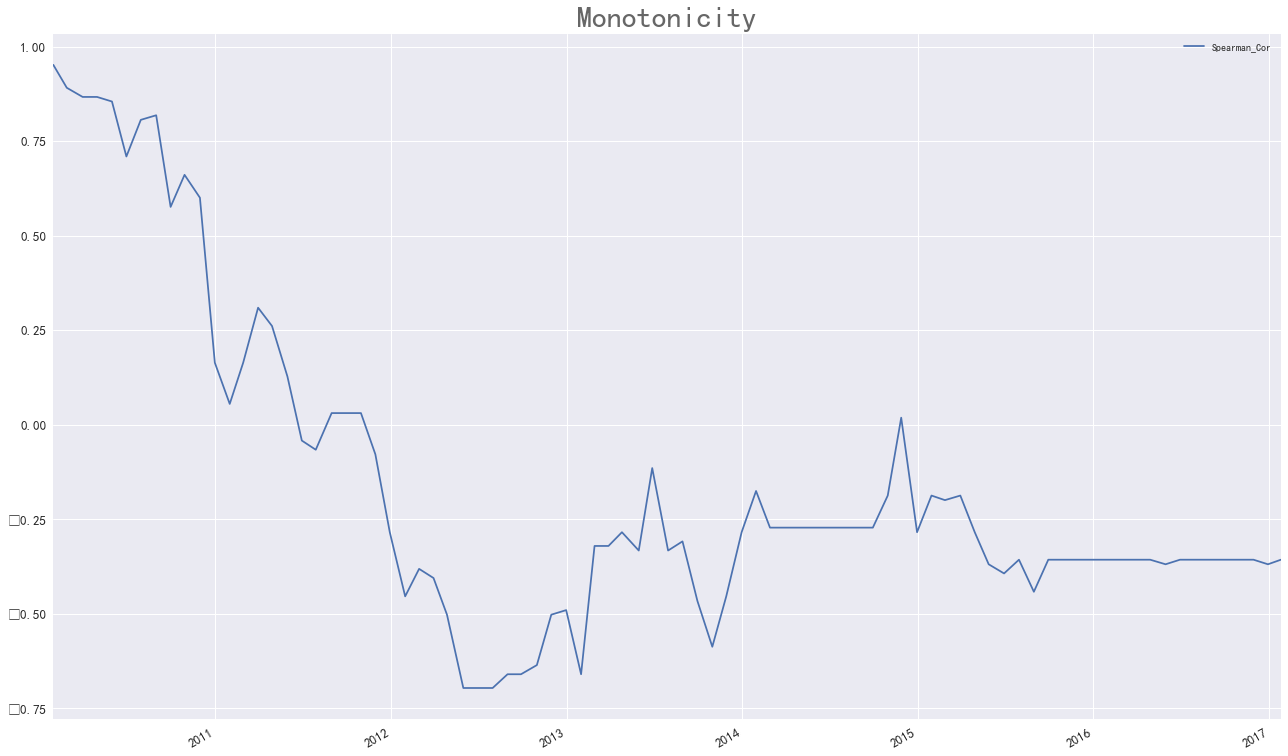

In [1048]:
# Plot
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
monoDF.plot(figsize=(22,14),ax=ax,fontsize =13,title ='Monotonicity')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

In [1049]:
# monotonicity information 
print monoDF.std()
print monoDF.median()

Spearman_Cor    0.419446
dtype: float64
Spearman_Cor   -0.284848
dtype: float64


In [1050]:
# basic indicator
annualizedReturn = (1+ReturnDF.mean())**12 - 1
annualizedVol = ReturnDF.std()* np.sqrt(12)
sharpeRatio = annualizedReturn / annualizedVol 
print 'Annual Return:','\n',annualizedReturn,'\n\n','Annual Volatility:','\n',annualizedVol,'\n\n','Sharpe Ratio:''\n',sharpeRatio

Annual Return: 
group_0         0.063857
group_1         0.084125
group_2         0.123037
group_3         0.123119
group_4         0.126504
group_5         0.134703
group_6         0.102793
group_7         0.070882
group_8         0.026325
group_9        -0.055935
top_bot_comb    0.126249
dtype: float64 

Annual Volatility: 
group_0         0.089076
group_1         0.075812
group_2         0.073994
group_3         0.072501
group_4         0.073167
group_5         0.068615
group_6         0.072157
group_7         0.064581
group_8         0.076821
group_9         0.096088
top_bot_comb    0.152102
dtype: float64 

Sharpe Ratio:
group_0         0.716890
group_1         1.109645
group_2         1.662786
group_3         1.698167
group_4         1.728973
group_5         1.963181
group_6         1.424586
group_7         1.097568
group_8         0.342676
group_9        -0.582122
top_bot_comb    0.830029
dtype: float64


In [1051]:
copyReturn = ReturnDF.copy()
copyReturn [copyReturn > copyReturn .mean()] =0
downsideRisk = ReturnDF.std(skipna = True) * np.sqrt(12)
downsideRisk

group_0         0.089076
group_1         0.075812
group_2         0.073994
group_3         0.072501
group_4         0.073167
group_5         0.068615
group_6         0.072157
group_7         0.064581
group_8         0.076821
group_9         0.096088
top_bot_comb    0.152102
dtype: float64

In [1052]:
sortinoRatio = annualizedReturn / downsideRisk
sortinoRatio

group_0         0.716890
group_1         1.109645
group_2         1.662786
group_3         1.698167
group_4         1.728973
group_5         1.963181
group_6         1.424586
group_7         1.097568
group_8         0.342676
group_9        -0.582122
top_bot_comb    0.830029
dtype: float64

In [1053]:
# Max drawdown
maxdd = netWorthDF.copy()
maxdd.iloc[0] = 0
for date in netWorthDF.index[1:]:
    maxdd.loc[date] = 1-netWorthDF.loc[date]/netWorthDF.loc[:date].max()
maxddInfo = pd.concat([maxdd.max(),maxdd.idxmax()],axis=1)
maxddInfo.columns = ['Max_drawdown','Time']
maxddInfo

Max_drawdown       Time
group_0           0.097241 2014-11-28
group_1           0.083211 2013-06-28
group_2           0.057706 2013-06-28
group_3           0.058016 2013-06-28
group_4           0.047262 2015-06-30
group_5           0.059062 2015-06-30
group_6           0.049989 2015-06-30
group_7           0.110948 2015-06-30
group_8           0.156241 2015-07-31
group_9           0.441436 2016-02-29
top_bot_comb      0.151151 2014-01-30

In [1054]:
# calmar Ratio
calmarRatio = annualizedReturn/ maxddInfo['Max_drawdown']
calmarRatio 

group_0         0.656694
group_1         1.010988
group_2         2.132138
group_3         2.122151
group_4         2.676632
group_5         2.280703
group_6         2.056296
group_7         0.638880
group_8         0.168488
group_9        -0.126711
top_bot_comb    0.835251
dtype: float64

In [1055]:
ReturnForPlot =ReturnDF.copy()

In [1056]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

In [1057]:
### the following part is to save return data of every factor into one Dataframe

In [1058]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [1059]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [1060]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([ 6,  9,  5, 21, 17, 27, 10, 23,  7,  3])

In [1061]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [1062]:
#------------------------------ Following part is to group  stocks within industry --------------------------

In [1063]:
wholeIndList = np.array(range(29))

wholeIndDict = getIndustryDict(endOfMonthList,wholeIndList,indusDF)

In [1064]:
multindexList = [endOfMonthList,wholeIndList]
induReturnDF  = pd.DataFrame(data=None, columns=totalGroupDict.values()[0].keys(),\
                             index=pd.MultiIndex.from_product(multindexList,names=['time','industry']),dtype=float)

In [1065]:
groupNumberThrottle = 10
for i,j in wholeIndDict.iteritems():
    print i
    factorIndice = factorData.loc[:i].tail()
    factorIndice = factorIndice[list(set(factorIndice.columns.tolist())- set(filterdict[date]))]  # Remove ST ,new and suspend stk
    for ind, stk in j.iteritems():
        intersection = list(set(factorIndice.columns.tolist()) & set(stk))
        if len(intersection) < groupNumberThrottle:
            induReturnDF.loc[i,ind] = 0
            continue
        else:
            stkgroup = ff.getStockGroup(factorIndice[intersection], groupNum=10, Mean_Num=1)
            for p,q in stkgroup.iteritems():
                try:
                    induReturnDF.loc[i,ind][p] = activeReturnData.loc[i][q].mean()
                except:
                    induReturnDF.loc[i,ind][p] = np.NaN

2016-12-30 00:00:00
2010-12-31 00:00:00
2015-05-29 00:00:00
2014-02-28 00:00:00
2012-03-30 00:00:00
2014-07-31 00:00:00
2012-11-30 00:00:00
2016-09-30 00:00:00
2013-07-31 00:00:00
2012-08-31 00:00:00
2014-11-28 00:00:00
2012-07-31 00:00:00
2012-04-27 00:00:00
2016-05-31 00:00:00
2014-05-30 00:00:00
2012-02-29 00:00:00
2013-09-30 00:00:00
2015-02-27 00:00:00
2015-07-31 00:00:00
2011-06-30 00:00:00
2011-05-31 00:00:00
2010-10-29 00:00:00
2010-11-30 00:00:00
2013-03-29 00:00:00
2010-07-30 00:00:00
2015-11-30 00:00:00
2012-05-31 00:00:00
2011-11-30 00:00:00
2011-07-29 00:00:00
2015-12-31 00:00:00
2011-02-28 00:00:00
2013-11-29 00:00:00
2016-03-31 00:00:00
2015-06-30 00:00:00
2011-04-29 00:00:00
2010-08-31 00:00:00
2013-01-31 00:00:00
2015-01-30 00:00:00
2011-12-30 00:00:00
2010-03-31 00:00:00
2011-03-31 00:00:00
2017-01-26 00:00:00
2011-09-30 00:00:00
2010-04-30 00:00:00
2016-10-31 00:00:00
2011-10-31 00:00:00
2012-06-29 00:00:00
2013-02-28 00:00:00
2014-09-30 00:00:00
2012-12-31 00:00:00


In [1066]:
finalReturn = induReturnDF.mean(level = 'time')
finalReturn.sort_index(axis=1,inplace=True)

In [1067]:
sortGroups = finalReturn[['group_0','group_9']].cumsum().iloc[-1].sort_values(ascending = False).index
top, bot = sortGroups[0], sortGroups[-1]

# Add another column
finalReturn['top_bot_comb'] = finalReturn[top] - finalReturn[bot]

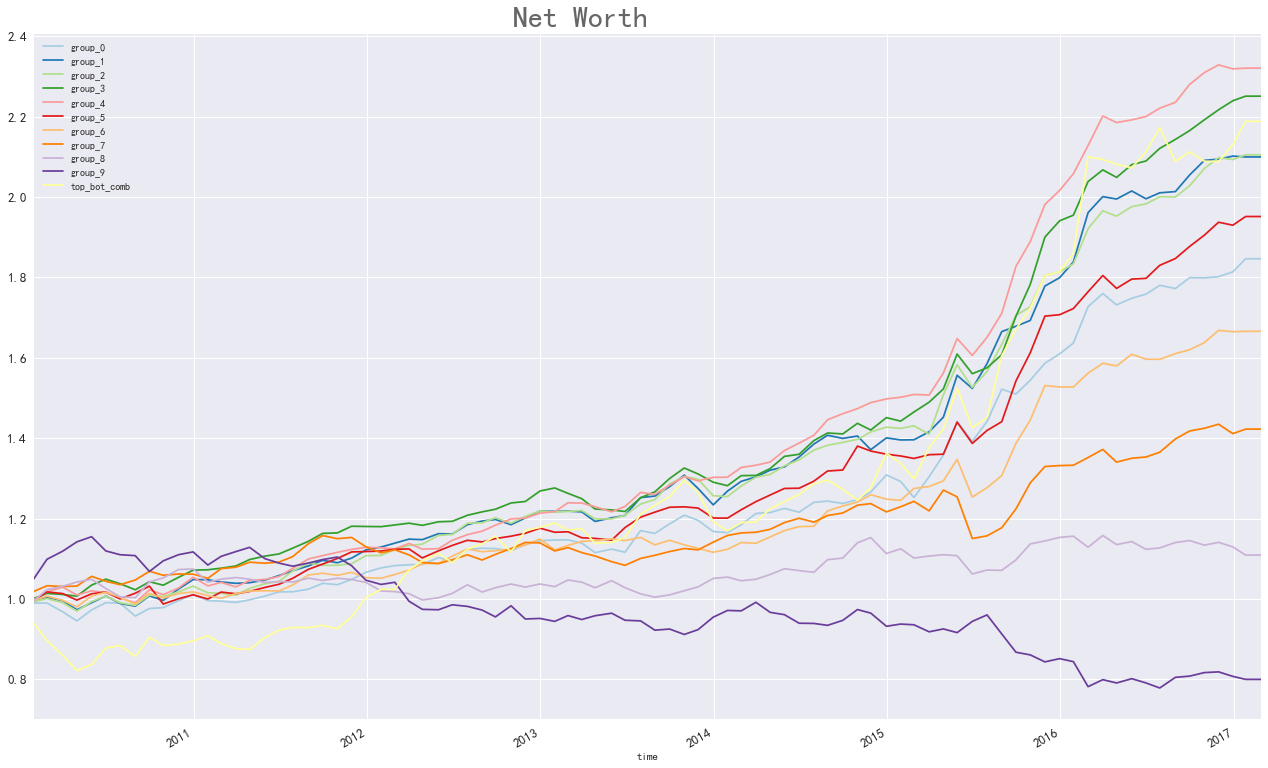

In [1068]:
indNetWorth = (finalReturn+1).cumprod()
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
indNetWorth.plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",11),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [1069]:
# basic indicator
annualizedReturnNew = (1+finalReturn.mean())**12 - 1
annualizedVolNew = finalReturn.std()* np.sqrt(12)
sharpeRatioNew = annualizedReturnNew / annualizedVolNew 
print 'Annual Return:','\n',annualizedReturnNew,'\n\n','Annual Volatility:','\n',annualizedVolNew,'\n\n','Sharpe Ratio:''\n',sharpeRatioNew

Annual Return: 
group_0         0.091579
group_1         0.111143
group_2         0.111327
group_3         0.121591
group_4         0.126343
group_5         0.099764
group_6         0.075675
group_7         0.052248
group_8         0.015969
group_9        -0.027947
top_bot_comb    0.122657
dtype: float64 

Annual Volatility: 
group_0         0.064908
group_1         0.062196
group_2         0.058878
group_3         0.056189
group_4         0.055646
group_5         0.060763
group_6         0.059193
group_7         0.059139
group_8         0.052975
group_9         0.075063
top_bot_comb    0.115353
dtype: float64 

Sharpe Ratio:
group_0         1.410906
group_1         1.786994
group_2         1.890807
group_3         2.163942
group_4         2.270500
group_5         1.641862
group_6         1.278453
group_7         0.883487
group_8         0.301450
group_9        -0.372317
top_bot_comb    1.063316
dtype: float64


In [1070]:
copyReturn = finalReturn.copy()
copyReturn[copyReturn > copyReturn.mean()] = 0
downsideRiskNew = copyReturn.std(skipna = True) * np.sqrt(12)
downsideRiskNew

group_0         0.028640
group_1         0.026846
group_2         0.025269
group_3         0.020999
group_4         0.021637
group_5         0.027451
group_6         0.030948
group_7         0.036644
group_8         0.030655
group_9         0.049876
top_bot_comb    0.055756
dtype: float64

In [1071]:
sortinoRatioNew = annualizedReturnNew / downsideRiskNew
sortinoRatioNew

group_0         3.197555
group_1         4.139989
group_2         4.405764
group_3         5.790379
group_4         5.839330
group_5         3.634223
group_6         2.445218
group_7         1.425816
group_8         0.520926
group_9        -0.560338
top_bot_comb    2.199908
dtype: float64

In [1072]:
# Max drawdown
maxdd1 = indNetWorth.copy()
maxdd1.iloc[0] = 0
for date in indNetWorth.index[1:]:
    maxdd1.loc[date] = 1-indNetWorth.loc[date]/indNetWorth.loc[:date].max()
maxddInfo1 = pd.concat([maxdd1.max(),maxdd1.idxmax()],axis=1)
maxddInfo1.columns = ['Max_drawdown','Time']
maxddInfo1

Max_drawdown       Time
group_0           0.044985 2010-04-30
group_1           0.056515 2013-12-31
group_2           0.038364 2014-01-30
group_3           0.045916 2013-06-28
group_4           0.038134 2010-08-31
group_5           0.043092 2010-10-29
group_6           0.069615 2015-06-30
group_7           0.094906 2015-06-30
group_8           0.078567 2015-06-30
group_9           0.325991 2016-07-29
top_bot_comb      0.125633 2010-04-30

In [1073]:
# calmar Ratio
calmarRatioNew = annualizedReturnNew/ maxddInfo1['Max_drawdown']
calmarRatioNew

group_0         2.035751
group_1         1.966606
group_2         2.901835
group_3         2.648124
group_4         3.313149
group_5         2.315131
group_6         1.087054
group_7         0.550526
group_8         0.203255
group_9        -0.085730
top_bot_comb    0.976312
dtype: float64

In [1074]:
def str_to_datetime_format(string):
    return '%Y/%m/%d' if '/'in string else '%Y-%m-%d'

In [1075]:
print  downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb']

0.152101994777 0.830028744048


In [1076]:
# save factor Information
if np.isnan(monoDF.median().values[0]) and np.isnan(sharpeRatio['top_bot_comb']):
    raise  Exception( 'Error! Please check the original data!')
savepath = 'C:/Users/LZJF_02/Desktop/myownliarbry'
infodata = np.array([[startTime,endTime,monoDF.median().values[0],monoDF.std().values[0],annualizedReturn['top_bot_comb'],annualizedVol['top_bot_comb'],sharpeRatio['top_bot_comb'],\
    downsideRisk['top_bot_comb'],sortinoRatio['top_bot_comb'], maxddInfo['Max_drawdown'].loc['top_bot_comb'],calmarRatio['top_bot_comb']]])
totalInfo = pd. DataFrame(index =[sololist[0].split('.')[0]],columns = ['Start_time','End_time','Mono_median','Mono_std','Annualized_return','Annualized_volatility','Sharpe_ratio','Downside_Risk',
                                                     'Sortino_ratio','Max_drawdown','Calmar_Ratio'],data= infodata)
totalInfo.index.name = 'Factor_Name'
try:
    readfacInfo = pd.read_csv(savepath+'/'+'factorInfo.csv',infer_datetime_format=True,parse_dates=[0],index_col=0)
except:  
    readfacInfo = totalInfo
    readfacInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')
factorName = sololist[0].split('.')[0]
if  factorName in readfacInfo.index:
    print factorName+ ' '+'already in the file!'
    try:
        begin = datetime.strptime(readfacInfo.loc[factorName]['Start_time'].split()[0],str_to_datetime_format(readfacInfo.loc[factorName]['Start_time']))
        end = datetime.strptime(readfacInfo.loc[factorName]['End_time'].split()[0],str_to_datetime_format(readfacInfo.loc[factorName]['End_time']))
    except:
        print 'the time type is already datetime!'
        begin = readfacInfo.loc[factorName]['Start_time']
        end = readfacInfo.loc[factorName]['End_time']
    print begin,startTime, end, endTime
    if  begin > startTime or  end < endTime:
        print  'update needed'
        print  readfacInfo.loc[factorName].values 
        print infodata.flatten()
        readfacInfo.loc[factorName] = infodata.flatten()
    updatedInfo = readfacInfo
else:
    updatedInfo = pd.concat([readfacInfo,totalInfo])
    updatedInfo = updatedInfo.rename(columns = {'End_Time': 'End_time'})
updatedInfo.to_csv(savepath+'/'+'factorInfo.csv',na_rep='NaN')

In [1077]:
updatedInfo

Start_time  \
Factor_Name                                                         
Own_Factor_Turnover_Volatility_deviation_20D  2010-01-01 00:00:00   
Own_Factor_ILLQ-1d                            2010-01-01 00:00:00   
Own_Factor_Idiosyncratic_Volatility           2010-01-01 00:00:00   
Own_Factor_ADJ_Turnover_Volatility_20D        2010-01-01 00:00:00   
LZ_GPA_VAL_PE                                 2010-01-01 00:00:00   
LZ_GPA_VAL_PB                                 2010-01-01 00:00:00   
LZ_GPA_VAL_PS                                 2010-01-01 00:00:00   
LZ_GPA_FIN_IND_QFA_YOYGR                      2010-01-01 00:00:00   
LZ_GPA_FIN_IND_YOYBPS                         2010-01-01 00:00:00   
LZ_GPA_FIN_IND_QFA_YOYNETPROFIT               2010-01-01 00:00:00   
LZ_GPA_FIN_IND_CAPITALIZEDTODA                2010-01-01 00:00:00   
LZ_GPA_FIN_IND_CASHRATIO                      2010-01-01 00:00:00   
LZ_GPA_DERI_Momentum_1M                       2010-01-01 00:00:00   
LZ_GPA_TURNOVER_TurnoverAvg_3M                2010-01-01 00:00:00   
LZ_GPA_VAL_TURN                               2010-01-01 00:00:00   
Own_Factor_Volatility_90d                     2010-01-01 00:00:00   
Own_Factor_DDA-20d                            2010-01-01 00:00:00   
Own_Factor_Skewness_250d                      2010-01-01 00:00:00   
LZ_GPA_FIN_IND_OCFTODEBT                      2010-01-01 00:00:00   
Own_Factor_Return_Skew_250D                   2010-01-01 00:00:00   
Own_Factor_5_20_return_deviation_1D           2010-01-01 00:00:00   
Own_Factor_downside_risk_252D                 2010-01-01 00:00:00   
Own_Factor_sortino_ratio_20D                  2010-01-01 00:00:00   
Own_Factor_excess_return_20D                  2010-01-01 00:00:00   
Uqer_factor_AD20                              2010-01-01 00:00:00   
Uqer_factor_ADTM                              2010-01-01 00:00:00   
Uqer_factor_ATR6                              2010-01-01 00:00:00   
Uqer_factor_Aroon                             2010-01-01 00:00:00   
Uqer_factor_BIAS10                            2010-01-01 00:00:00   
LZ_GPA_FIN_IND_ROE                            2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_60D                 2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_120D                2010-01-01 00:00:00   
Own_Factor_ROE_Volatility_250D                2010-01-01 00:00:00   
Uqer_factor_CCI10                             2010-01-01 00:00:00   
Uqer_factor_KDJ_K                             2010-01-01 00:00:00   
Uqer_factor_ROC6                              2010-01-01 00:00:00   
Uqer_factor_RVI                               2010-01-01 00:00:00   
Uqer_factor_CMO                               2010-01-01 00:00:00   
Uqer_factor_RSI                               2010-01-01 00:00:00   

                                                         End_time Mono_median  \
Factor_Name                                                                     
Own_Factor_Turnover_Volatility_deviation_20D  2017-02-28 00:00:00   -0.927273   
Own_Factor_ILLQ-1d                            2017-02-28 00:00:00    0.987879   
Own_Factor_Idiosyncratic_Volatility           2017-02-28 00:00:00    -0.90303   
Own_Factor_ADJ_Turnover_Volatility_20D        2017-02-28 00:00:00          -1   
LZ_GPA_VAL_PE                                 2017-02-28 00:00:00    0.757576   
LZ_GPA_VAL_PB                                 2017-02-28 00:00:00   -0.115152   
LZ_GPA_VAL_PS                                 2017-02-28 00:00:00     0.10303   
LZ_GPA_FIN_IND_QFA_YOYGR                      2017-02-28 00:00:00    0.939394   
LZ_GPA_FIN_IND_YOYBPS                         2017-02-28 00:00:00         0.2   
LZ_GPA_FIN_IND_QFA_YOYNETPROFIT               2017-02-28 00:00:00    0.890909   
LZ_GPA_FIN_IND_CAPITALIZEDTODA                2017-02-28 00:00:00    0.248485   
LZ_GPA_FIN_IND_CASHRATIO                      2017-02-28 00:00:00    0.842424   
LZ_GPA_DERI_Momentum_1M                       2017-02-28 00:00:00   -0.975758   
LZ_GPA_TUR

In [1078]:
'''define the risk preference weight indice before perform kmeans clustering'''

'define the risk preference weight indice before perform kmeans clustering'

In [1079]:
mat =updatedInfo.dropna(axis=0).iloc[:,2:].as_matrix()
# Using sklearn
km = KMeans(n_clusters=3)
result = km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame(data=labels, columns=['cluster'],index = updatedInfo.index)

In [1080]:
results.groupby(['cluster'])

In [1081]:
for name,group in results.groupby(['cluster']):
    print group

                    cluster
Factor_Name                
LZ_GPA_VAL_TURN           0
Own_Factor_DDA-20d        0
Uqer_factor_ATR6          0
                                     cluster
Factor_Name                                 
LZ_GPA_VAL_PE                              1
LZ_GPA_VAL_PB                              1
LZ_GPA_VAL_PS                              1
LZ_GPA_FIN_IND_YOYBPS                      1
LZ_GPA_FIN_IND_CAPITALIZEDTODA             1
LZ_GPA_FIN_IND_CASHRATIO                   1
LZ_GPA_TURNOVER_TurnoverAvg_3M             1
Own_Factor_Volatility_90d                  1
LZ_GPA_FIN_IND_OCFTODEBT                   1
Own_Factor_5_20_return_deviation_1D        1
Own_Factor_downside_risk_252D              1
Own_Factor_excess_return_20D               1
LZ_GPA_FIN_IND_ROE                         1
Own_Factor_ROE_Volatility_60D              1
Own_Factor_ROE_Volatility_120D             1
Uqer_factor_KDJ_K                          1
Uqer_factor_RVI                            1
     

In [1082]:
(maxddInfo1-maxddInfo)

Max_drawdown       Time
group_0          -0.052255 -1673 days
group_1          -0.026695   186 days
group_2          -0.019341   216 days
group_3          -0.012100     0 days
group_4          -0.009128 -1764 days
group_5          -0.015970 -1705 days
group_6           0.019625     0 days
group_7          -0.016042     0 days
group_8          -0.077674   -31 days
group_9          -0.115445   151 days
top_bot_comb     -0.025518 -1371 days

In [1083]:
#--------------------------------------  Section End   -------------------------------------

In [1084]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [1085]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [1086]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [1087]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [1088]:
indusGroupDF

建筑         机械       基础化工      非银行金融         医药  \
time       stats                                                           
2010-01-29 mean    36.164803  36.687500  32.708381  40.235171  38.681505   
           median  34.772500  36.618800  27.556300  39.597400  37.444900   
           std     12.633115  10.663036  16.416975   8.027634  12.413520   
2010-02-26 mean    68.371294  68.990459  64.853838  51.510593  69.314751   
           median  69.416100  71.829100  61.292600  49.807750  70.722400   
           std     12.229365  10.769332  11.838556   8.339965   8.965843   
2010-03-31 mean    66.400256  66.352543  60.710384  68.157786  65.777549   
           median  67.175000  67.218950  62.137600  66.373500  66.460700   
           std     12.054927   9.943503  10.461032   6.827488  12.136049   
2010-04-30 mean    28.945608  31.512691  27.390038  27.277814  28.297019   
           median  27.635300  30.054800  26.885200  24.238300  25.576900   
           std     12.312599  13.487165  13.141154  14.225041  13.992682   
2010-05-31 mean    45.714706  43.542063  38.301683  39.569293  45.942817   
           median  43.728650  41.893400  37.573200  37.792100  41.972050   
           std     12.658138  12.696629   8.198368   6.413996  14.893972   
2010-06-30 mean    27.493925  29.973630  29.621014  45.202157  32.728585   
           median  25.192100  27.915200  28.600300  41.811150  31.189700   
           std     13.340193  10.459878   9.241143  10.534506  14.147210   
2010-07-30 mean    70.418143  71.683584  78.158405  64.478247  69.661705   
           median  70.729450  73.739100  78.947400  66.270600  69.104500   
           std     10.309213   9.930993   7.042735   5.803856   9.076785   
2010-08-31 mean    61.453263  58.091493  56.016308  45.476847  64.422282   
           median  60.711200  58.801500  54.893000  44.675300  63.069500   
           std     13.112517  14.861927  11.648121   7.104220  12.262819   
2010-09-30 mean    45.427578  46.864260  40.114103  34.090663  48.883574   
           median  43.760100  45.289400  37.117900  35.389450  48.120600   
           std     14.216925  11.454176  14.623985  10.512238  15.366517   
2010-10-29 mean    56.588179  54.308807  54.749732  57.143894  55.483668   
           median  56.880300  54.071200  54.557600  56.089050  54.564200   
           std     12.296064   9.573397  13.268700   6.429047  10.544551   
...                      ...        ...        ...        ...        ...   
2016-05-31 mean    60.382165  54.340407  55.494283  75.885081  61.153837   
           median  59.952600  55.739500  55.285700  77.971550  61.056400   
           std     11.815834  12.595097  13.398382  14.469564  10.896099   
2016-06-30 mean    65.345658  61.513082  55.511290  59.114162  64.824184   
           median  67.820100  65.129000  57.385000  62.095050  68.789800   
           std     13.012869  14.299418  15.999937  11.931815  13.437092   
2016-07-29 mean    39.024892  43.294904  34.302226  50.217419  40.456195   
           median  35.394150  42.857100  32.982400  50.000000  40.000000   
           std     17.118589  17.303355  14.756405  11.017115  16.065767   
2016-08-31 mean    53.787553  54.295660  50.686864  31.733237  50.037537   
           median  54.140050  54.023000  49.725000  30.628800  51.867100   
           std     15.137636  18.321144  13.234252  11.149579  15.397360   
2016-09-30 mean    58.081449  56.177216  54.659819  50.742212  51.391437   
           median  59.959900  53.846200  51.520750  48.934250  49.526100   
           std     17.177818  15.796129  13.620313   8.137220  14.294773   
2016-10-31 mean    48.972124  49.309096  52.440174  59.259687  51.596351   
           median  47.103350  51.351400  51.987000  60.196700  52.733100   
           std     15.802138  18.517744  13.349142  10.192095  12.431937   
2016-11-30 mean    43.617201  47.763024  52.776624  71.697206  47.269722   
           median  41.779150  46.183400  52.128600  72.538450  50.467300  

In [1089]:
capGroupsDF.head()

small       mid       huge
time       stats                                 
2010-01-29 mean    47.935985  42.97140  39.272107
           median  44.454600  40.22220  37.758100
           std     19.754948  15.11507  14.579704
2010-02-26 mean    65.907090  67.59258  63.673809
           median  67.315750  68.34660  63.736200

In [1090]:
from numpy import fromfile, dtype
from pandas import DataFrame
dt = dtype([('date', 'int'), ('time', '<i4'), ('code', 'string'),('current','int'),('amt','float'),('volume',int),('open','float64'),('high','float64'),('low','float64'),('close','float')])
records = fromfile('D:/cStrategy/data/StockIndexFutures/1M/IF1706', dt)
df = DataFrame(records)

In [1091]:
df

date        time code     current            amt      volume  \
0       33554432    10629889       128070401   7.351163e+40  1727703104   
1              0          64                0  4.778310e-299    10629889   
2    -1701209703    13904961                0  3.038652e-319           0   
3    -1701209703 -1716672448    � -1701209703  9.359878e-315       61503   
4    -1701209703  1722198080    f  1717986918  1.903599e+185  1487947073   
5     1717986918  1722198080    f  1717986918  1.903599e+185  1722198080   
6     1013776640  1722198080    f  1717986918   4.667261e-62  1722198080   
7      134217728    10629889      -1603469056   4.667261e-62    13281344   
8              0           0        150994944  2.463043e-287  1723115584   
9              0          64                0  1.065599e-255    10629889   
10             0  -252564415                0  3.038652e-319           0   
11             0    11708480                0  1.267712e-314       61503   
12             0    11708480                0  6.238065e-317   352074817   
13             0  1723902016    f  1717986918  1.903599e+185  1723115584   
14    -126942976  1723115584    f  1717986918  -6.065988e+66  1723115584   
15     335544320    10629889       1550844160  -6.065988e+66  -859264960   
16             0           0        402653184  -2.560625e+02  -859264960   
17             0        4160                0  8.086349e-174    10629889   
18             0   873020737                0  3.162020e-322           0   
19   -1701209703 -1715361728    � -1701209703  1.823792e-314          64   
20    1717986918 -1715361728    � -1701209703  1.903599e+185  -805098175   
21    1717986918   868460608    3   858993459   4.667261e-62   868460608   
22   -1267597056   868460608    3   858993459   4.667261e-62   868460608   
23     587202560    10629889        410190080   4.667261e-62   868460608   
24             0           0        603979776  2.963185e+291   868460608   
25             0           0                0  2.751642e-135    10629889   
26     858993459           0                0   0.000000e+00           0   
27    1717986918  1723770944    f  1717986918  2.735117e-315       61503   
28     858993459 -1715623872    � -1701209703   4.667261e-62   553598017   
29     858993459   868198464    3   858993459   4.667261e-62   868198464   
...          ...         ...  ...         ...            ...         ...   
1615 -1358888960   128070401      -1003552256  -6.065988e+66  -859789248   
1616           0           0      -1358888960  4.062690e-115  -859789248   
1617           0           0                0  -2.800271e-82   128070401   
1618  -842216244           0                0   0.000000e+00           0   
1619  -842216244  -859789248    �  -842216244   0.000000e+00           0   
1620  -842216244    12232768                0  6.043790e-317  -117887935   
1621           0    12232768                0  6.043790e-317    12232768   
1622   473039360    12232768                0  6.043790e-317    12232768   
1623 -1342111744   128070401      -2144206336  6.043790e-317    12232768   
1624           0           0      -1342111744 -4.453880e+174    12232768   
1625           0           0                0  -1.835186e-77   128070401   
1626           0           0                0   0.000000e+00           0   
1627           0    12232768                0   0.000000e+00           0   
1628           0    12232768                0  6.043790e-317           0   
1629           0    12232768                0  6.043790e-317    12232768   
1630  -667680256    12232768                0  6.043790e-317    12232768   
1631 -1308557312   128070401       1010106880  6.043790e-317    12232768   
1632           0           0      -1308557312 -1.566834e-153    12232768   
1633           0           0                0  -7.882063e-68   128070401   
1634           0           0                0   0.000000e+00           0   
1635           0    12232768                0   0.000000e+00

In [1092]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [1093]:
newstack.head()

stats            mean                          median                      \
cap              huge        mid      small      huge       mid     small   
time                                                                        
2010-01-29  39.272107  42.971400  47.935985  37.75810  40.22220  44.45460   
2010-02-26  63.673809  67.592580  65.907090  63.73620  68.34660  67.31575   
2010-03-31  64.998493  67.220184  65.895199  64.78530  68.77905  68.18325   
2010-04-30  32.459213  32.677850  40.130154  30.32420  30.26200  35.28915   
2010-05-31  47.607216  47.347316  52.027089  45.60095  45.77690  51.24050   

stats             std                        
cap              huge        mid      small  
time                                         
2010-01-29  14.579704  15.115070  19.754948  
2010-02-26  11.910257  12.294123  15.253202  
2010-03-31  12.625763  13.632535  14.929005  
2010-04-30  15.453442  15.692939  20.266592  
2010-05-31  12.424089  13.704632  15.323899

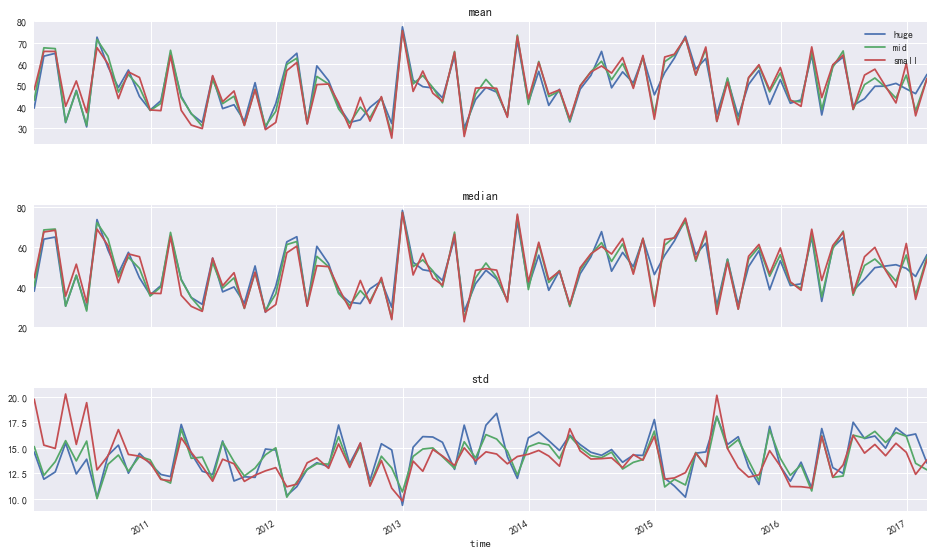

In [1094]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [1095]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

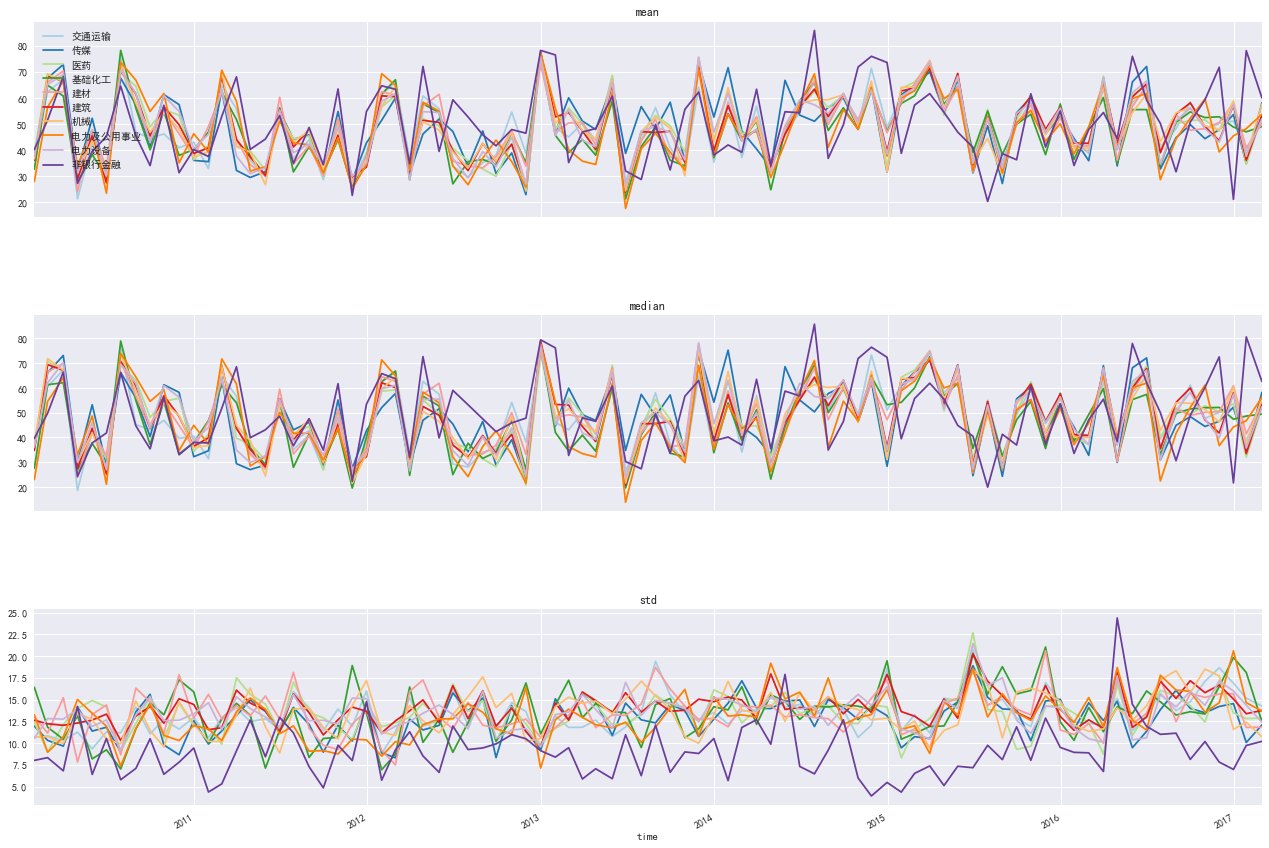

In [1096]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [1097]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [1098]:
copydata.pivot_table(index='time',columns='stats').head()

small                             mid                       \
stats            mean    median        std       mean    median        std   
time                                                                         
2010-01-29  47.935985  44.45460  19.754948  42.971400  40.22220  15.115070   
2010-02-26  65.907090  67.31575  15.253202  67.592580  68.34660  12.294123   
2010-03-31  65.895199  68.18325  14.929005  67.220184  68.77905  13.632535   
2010-04-30  40.130154  35.28915  20.266592  32.677850  30.26200  15.692939   
2010-05-31  52.027089  51.24050  15.323899  47.347316  45.77690  13.704632   

                 huge                       
stats            mean    median        std  
time                                        
2010-01-29  39.272107  37.75810  14.579704  
2010-02-26  63.673809  63.73620  11.910257  
2010-03-31  64.998493  64.78530  12.625763  
2010-04-30  32.459213  30.32420  15.453442  
2010-05-31  47.607216  45.60095  12.424089

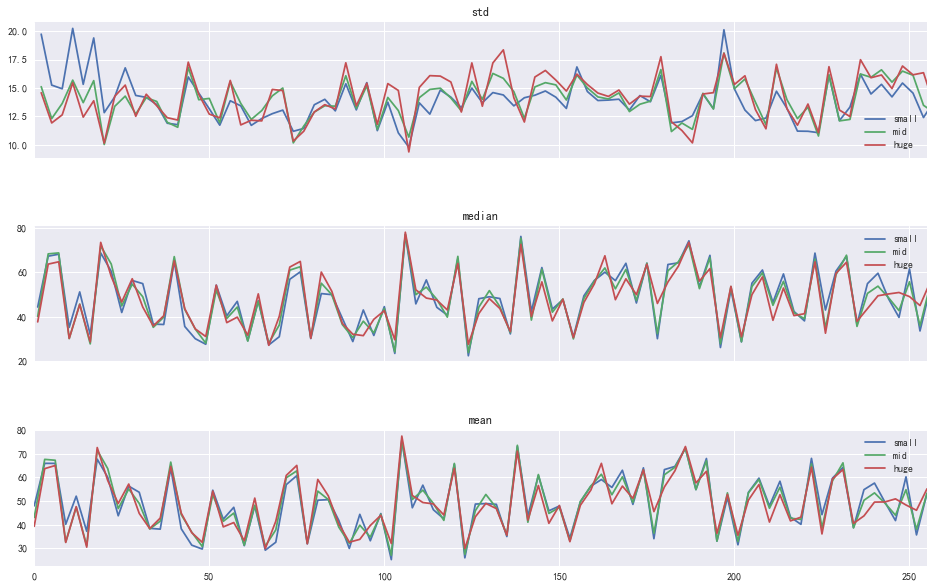

In [1099]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)